# SETUP
This Specific File is meant for me being stupid.

In [1]:
import torch

device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')

torch.set_default_device(device)
print(f"Using Device = {torch.get_default_device()}")

Using Device = cpu


In [2]:
import pandas as pd

totalcattle = pd.read_csv("Data/TotalCattle.csv")
janind = totalcattle['Period']=="FIRST OF JAN"
JanData = totalcattle[['Year','Value']][janind].sort_index(ascending=False).reset_index()
CattleData = JanData['Value'].str.replace(',','').astype(int).to_numpy()

In [3]:
import numpy as np

# RNN Testting

In [5]:
import torch.nn as nn
rnn = nn.LSTM(10,10,1)

In [6]:
rnn.weight_hh_l0.shape

torch.Size([40, 10])

In [7]:
rnn.weight_ih_l0.shape

torch.Size([40, 10])

In [8]:
rnn.weight_hh_l1.shape

AttributeError: 'LSTM' object has no attribute 'weight_hh_l1'

In [ ]:
rnn.weight_ih_l1.shape

In [ ]:
input = torch.randn(6, 3, 10)
h0 = torch.randn(1, 3, 10)
c0 = torch.randn(1, 3, 10)

In [ ]:
input.shape

In [ ]:
output, (hn, cn) = rnn(input, (h0,c0))

In [ ]:
output.shape

In [ ]:
cn.shape

In [ ]:
hn.shape

In [ ]:
import torch
import numpy as np

x = np.ones((2,3,4))
x_tensor = torch.FloatTensor(x)
x_tensor.shape

In [ ]:
x_squoze = x_tensor.unsqueeze(-1)
x_squoze.shape

In [ ]:
x_tensor

In [ ]:
x_squoze

# Module Dataset Splitting

In [4]:
import series as sr

train_set, test_set = sr.SeriesSetBuilder(CattleData,30,20,1)

129


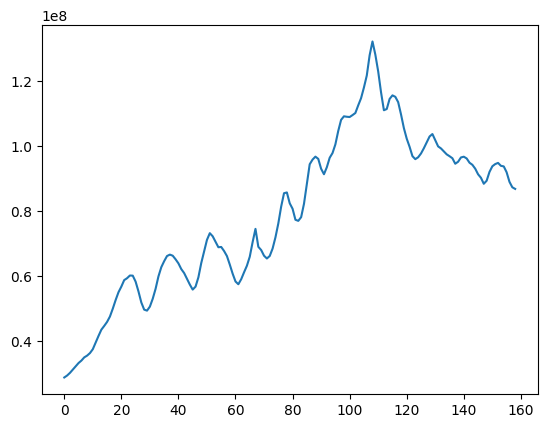

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(CattleData)
plt.show()

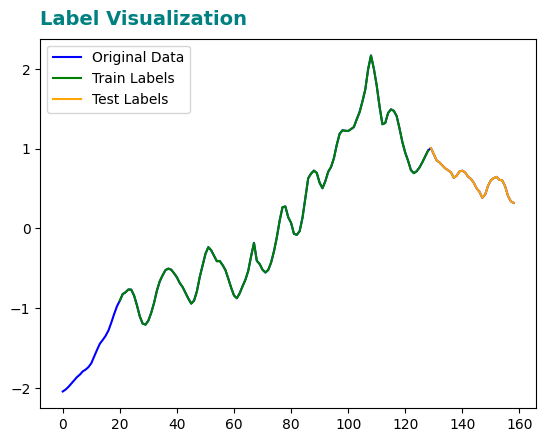

In [6]:
sr.SplitDataPlotter(CattleData,train_set,test_set)

# Model Training

In [7]:
import torch.nn as nn

In [8]:
class CattleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size,
            hidden_size,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x: (batch, seq_len, input_size)
        _, (h_n, _) = self.lstm(x)

        # last layer hidden state
        h_last = h_n[-1]           # (batch, hidden_size)
        out = self.fc(h_last)      # (batch, output_size)

        return out

In [9]:
n_hidden = 20

lstm = CattleLSTM(input_size=1,hidden_size=n_hidden,output_size=1)

In [10]:
loss_fn = nn.MSELoss()

learning_rate=0.7e-3
batch_size = 10

optimizer = torch.optim.Adam(lstm.parameters(),lr=learning_rate)

In [11]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_set, batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

In [12]:
epochs = 200
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    sr.SeriesTrainNTest(lstm,
                        train_loader,test_loader,
                        loss_fn=loss_fn,optimizer=optimizer)
print("Done!")

Epoch 1
-------------------------------
Loss: 1.114459    [0    /  109]
Loss: 0.391903    [50   /  109]
Loss: 0.724045    [100  /  109]
Test Error: 
 Avg Loss: 0.670956
Epoch 2
-------------------------------
Loss: 1.343665    [0    /  109]
Loss: 1.055299    [50   /  109]
Loss: 0.515112    [100  /  109]
Test Error: 
 Avg Loss: 0.604845
Epoch 3
-------------------------------
Loss: 1.020772    [0    /  109]
Loss: 1.116077    [50   /  109]
Loss: 0.380444    [100  /  109]
Test Error: 
 Avg Loss: 0.539881
Epoch 4
-------------------------------
Loss: 1.546715    [0    /  109]
Loss: 0.858688    [50   /  109]
Loss: 0.447943    [100  /  109]
Test Error: 
 Avg Loss: 0.467349
Epoch 5
-------------------------------
Loss: 1.068530    [0    /  109]
Loss: 1.030703    [50   /  109]
Loss: 0.988875    [100  /  109]
Test Error: 
 Avg Loss: 0.390351
Epoch 6
-------------------------------
Loss: 0.542115    [0    /  109]
Loss: 0.759101    [50   /  109]
Loss: 0.652479    [100  /  109]
Test Error: 
 Avg L

In [13]:
predictions = sr.SeriesModelTester(lstm,test_loader,loss_fn,final=True)

Test Error: 
 Avg Loss: 0.081412


In [14]:
predictions

array([1.0573968 , 1.1218637 , 1.1248649 , 1.1008655 , 1.0865506 ,
       1.0691855 , 1.0485843 , 1.0294011 , 1.0074279 , 0.96339667,
       0.9504771 , 0.96283305, 0.9680555 , 0.9583497 , 0.9290036 ,
       0.90303874, 0.8674798 , 0.8176775 , 0.77258426, 0.71357745,
       0.6978584 , 0.7328432 , 0.7751376 , 0.8048146 , 0.82528925,
       0.81933403, 0.8153572 , 0.7816961 , 0.71373904, 0.6520604 ],
      dtype=float32)

# Results

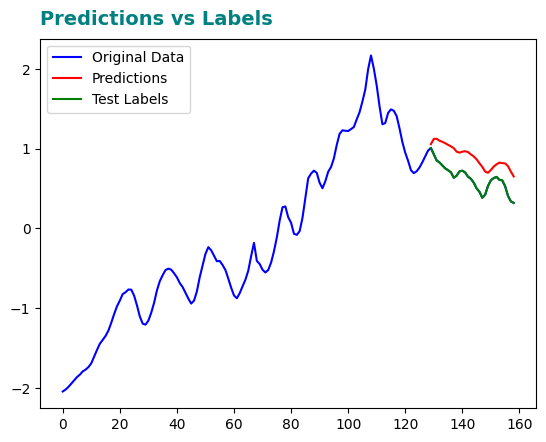

In [15]:
sr.SeriesPredPlotter(CattleData,train_set,test_set,predictions)